# Aula 3 - analisando os dados do IMdB

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv'
imdb = pd.read_csv(uri)

In [5]:
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Uma abordagem para analise exploratória é entender cada coluna do dataset

## Cor

### A coluna color tem valores nulos
É legal visualizar quais são os valores unicos para identificar as possibilidades do campo e também traçar uma estratégia para lidar com dados faltantes.

In [7]:
cor = imdb['color']
cor.unique()

array(['Color', nan, ' Black and White'], dtype=object)

### Ao tentar contar os valores, note que o metodo ignora dos dados faltantes

In [8]:
cor.value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

### Também é possivel visualizar em percentual a representatividade de cada cor

In [11]:
cor.value_counts(normalize=True)*100

Color               95.839968
 Black and White     4.160032
Name: color, dtype: float64

## Diretor

### Analisar o numero de filmes que cada diretor fez

In [13]:
diretor = imdb['director_name']
diretor.value_counts().head(10)

Steven Spielberg     26
Woody Allen          22
Clint Eastwood       20
Martin Scorsese      20
Ridley Scott         17
Spike Lee            16
Tim Burton           16
Steven Soderbergh    16
Renny Harlin         15
Oliver Stone         14
Name: director_name, dtype: int64

## Críticas e Gastos

In [15]:
criticas = imdb['num_critic_for_reviews']
criticas.describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

In [18]:
gastos = imdb['gross']
gastos.describe()

count    4.159000e+03
mean     4.846841e+07
std      6.845299e+07
min      1.620000e+02
25%      5.340988e+06
50%      2.551750e+07
75%      6.230944e+07
max      7.605058e+08
Name: gross, dtype: float64

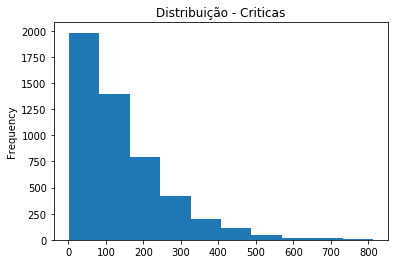

In [19]:
criticas.plot(kind='hist')
plt.title('Distribuição - Criticas')
plt.show()

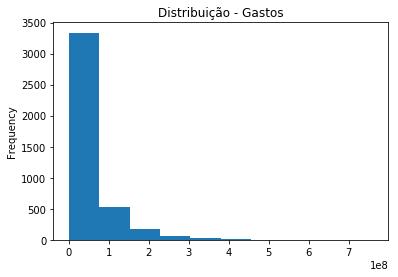

In [21]:
gastos.plot(kind='hist', title='Distribuição - Gastos')
plt.show()

> Note que a distribuição dos gastos no eixo x os numeros estão elevados a 8ª potencia. 

C:\Users\victor.bertoldo\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


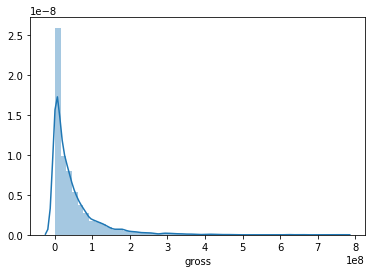

In [23]:
sns.distplot(gastos)
plt.show()

## Ordenar dataframe pelos maiores gastos

In [24]:
imdb.sort_values('gross', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000


In [25]:
imdb.sort_values('gross', ascending=False).sample(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1071,Color,Brad Furman,72.0,127.0,65.0,345.0,Amy Ryan,788.0,14946229.0,Biography|Crime|Drama|Thriller,...,29.0,English,UK,R,25000000.0,2016.0,423.0,7.3,2.35,0
3658,Color,Christopher M. Bessette,6.0,88.0,0.0,57.0,John Billingsley,978.0,15059.0,Drama|Thriller,...,8.0,English,USA,PG-13,NaN,2012.0,323.0,5.4,2.35,543
414,Color,Jean-Jacques Annaud,187.0,131.0,218.0,29.0,Gabriel Thomson,5000.0,51396781.0,Drama|History|War,...,662.0,English,USA,R,68000000.0,2001.0,35.0,7.6,2.35,0
2405,Color,David Bowers,103.0,99.0,42.0,557.0,Rachael Harris,975.0,52691009.0,Comedy|Family,...,45.0,English,USA,PG,21000000.0,2011.0,569.0,6.6,2.35,0
1082,Color,Phillip Noyce,47.0,117.0,176.0,308.0,Polly Walker,11000.0,83287363.0,Action|Thriller,...,137.0,English,USA,R,45000000.0,1992.0,530.0,6.9,2.35,0
4383,Color,Mark Illsley,77.0,98.0,3.0,327.0,Illeana Douglas,349.0,1943649.0,Comedy|Crime|Romance,...,122.0,English,USA,PG-13,1700000.0,1999.0,347.0,6.3,1.85,374
2906,Color,Mark Herman,185.0,94.0,39.0,18.0,Sheila Hancock,77.0,9030581.0,Drama|War,...,398.0,English,UK,PG-13,12500000.0,2008.0,32.0,7.8,1.85,38000
4966,Color,Dan Reed,61.0,80.0,3.0,140.0,Adam Rayner,798.0,NaN,Thriller,...,44.0,English,UK,R,1800000.0,2007.0,279.0,5.6,1.85,246
4780,Color,Matty Rich,8.0,91.0,10.0,10.0,George T. Odom,353.0,2712293.0,Crime|Drama,...,11.0,English,USA,R,450000.0,1991.0,12.0,5.9,1.85,123
3141,Color,John Madden,158.0,122.0,108.0,111.0,Celia Imrie,220.0,33071558.0,Comedy|Drama,...,100.0,English,UK,PG,10000000.0,2015.0,186.0,6.6,2.35,21000
